In [93]:
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: How has life expectancy changed over time in each country? ##

In [94]:
data = pd.read_csv('../data/clean_data.csv')
print(data.head())


  Country  Year  Expectancy_in_years           GDP
0   Chile  2000                 77.3  7.786093e+10
1   Chile  2001                 77.3  7.097992e+10
2   Chile  2002                 77.8  6.973681e+10
3   Chile  2003                 77.9  7.564346e+10
4   Chile  2004                 78.0  9.921039e+10


### Summary Analysis ###

In [95]:
def life_expectancy_summary(data, value_col='Expectancy_in_years', country_col='Country'):
    summary = data.groupby('Country')['Expectancy_in_years'].agg(['mean','median']).reset_index()
    summary.columns = ['Country','Mean','Median']
    
    return summary.sort_values(by='Mean',ascending=False)


summary_data = life_expectancy_summary(data)
print(summary_data)

                    Country      Mean  Median
2                   Germany  79.65625   79.85
0                     Chile  78.94375   79.00
4  United States of America  78.06250   78.15
3                    Mexico  75.71875   75.65
1                     China  74.26250   74.45
5                  Zimbabwe  50.09375   47.40


### Plots ###

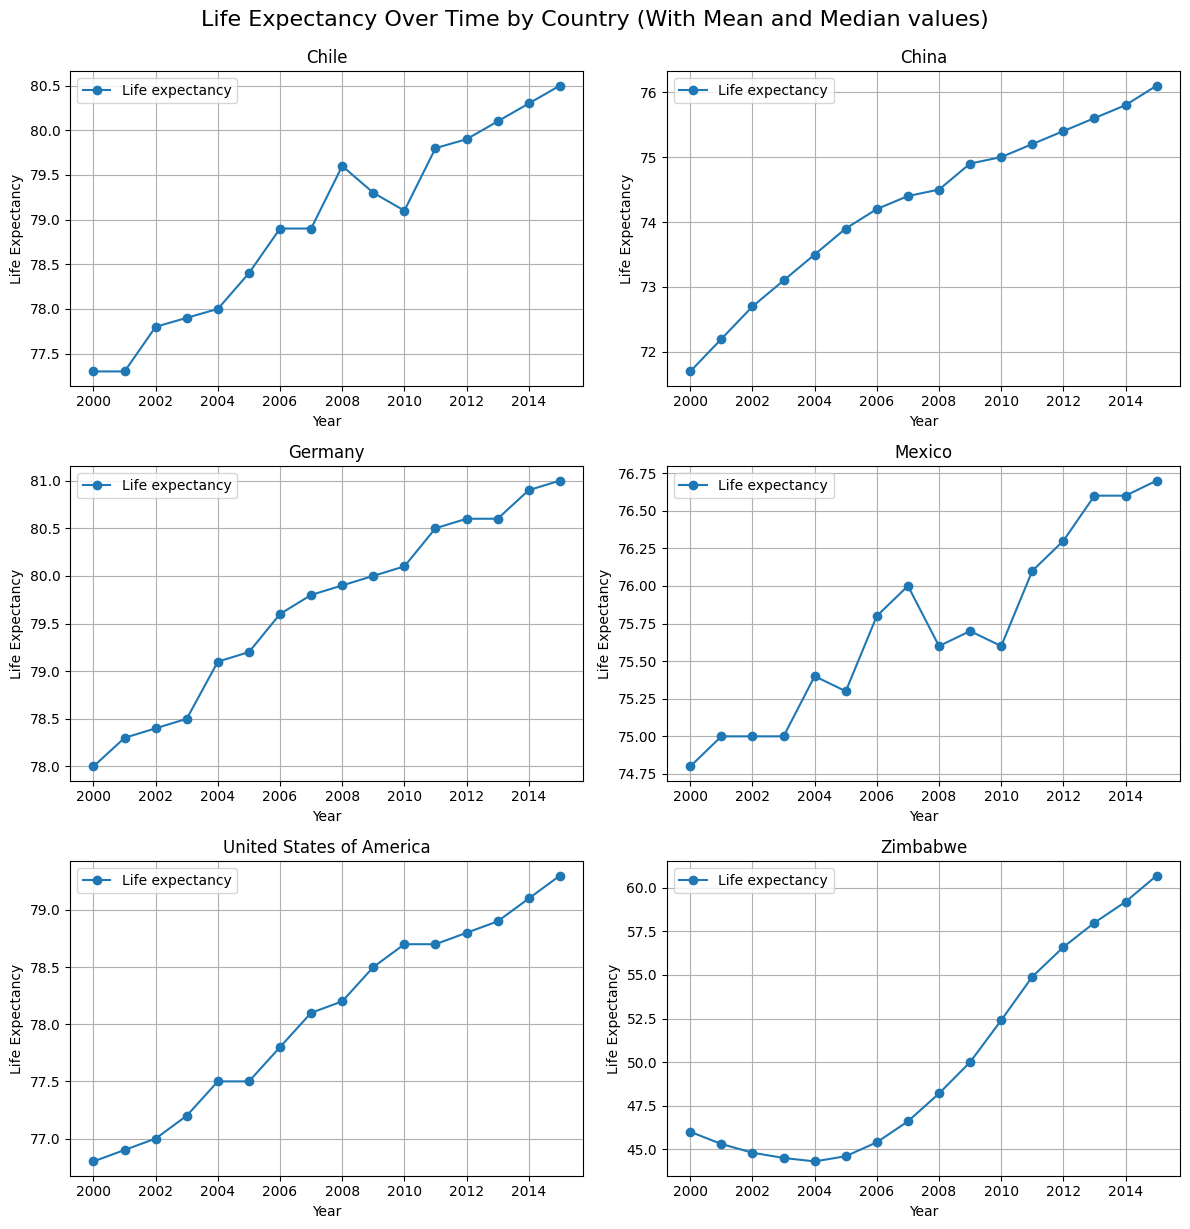

<Figure size 640x480 with 0 Axes>

In [96]:
def plot_life_vs_gdp(data,value_col='Expectancy_in_years',country_col='Country',year_col='Year'):
    countries = data[country_col].unique()
    num_countries = len(countries)

    cols = 2
    rows = (num_countries + cols - 1) // cols

    plt.figure(figsize=(12,4 * rows))

    for i in range(num_countries):
        country = countries[i]
        country_data = data[data[country_col] == country].sort_values(by=year_col)

        plt.subplot(rows,cols, i + 1)
        plt.plot(country_data[year_col],country_data[value_col],marker='o',label='Life expectancy')
        plt.title(country)
        plt.xlabel('Year')
        plt.ylabel('Life Expectancy')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.suptitle('Life Expectancy Over Time by Country (With Mean and Median values)',fontsize=16,y=1.02)
    plt.show()
    plt.clf()

plot_life_vs_gdp(data)


### Calculating Correlation ###

In [97]:
def life_expectancy_correlation(data):
    correlation_results = []

    for country in data['Country'].unique():
        sub_data = data[data['Country'] == country]
        corr = sub_data['Year'].corr(sub_data['Expectancy_in_years'])
        correlation_results.append({'Country': country, 'Correlation': corr})
    
    return pd.DataFrame(correlation_results)

print(life_expectancy_correlation(data))

                    Country  Correlation
0                     Chile     0.980543
1                     China     0.982734
2                   Germany     0.987377
3                    Mexico     0.950451
4  United States of America     0.992312
5                  Zimbabwe     0.923924


#### Answer: #### 
*The all correlation coefficients between Year and Life Expectancy for each country are very close to 1, thus mean a strong positive linear relationship between year and life expectancy.This confirms that life expectancy has consistantly increase over years in every country in the dataset.*

####

# Question2: Which country had the highest/lowest life expectancy in a given year? #

#### Summary Analyses ####

In [98]:
def life_expectancy_by_year(data):
    year_results = []

    for year in sorted(data['Year'].unique()):
        year_data = data[data['Year']== year]

        val_max = year_data['Expectancy_in_years'].max()
        val_min = year_data['Expectancy_in_years'].min()

        country_max = year_data[year_data['Expectancy_in_years'] == val_max]['Country'].values[0]
        country_min = year_data[year_data['Expectancy_in_years'] == val_min]['Country'].values[0]

        year_results.append({
            'Year': year,
            'Country with Max Life Expectancy': country_max,
            'Max Life Expectancy': val_max,
            'Country with Min Life Expectancy': country_min,
            'Min Life Expectancy': val_min,
        })

    return pd.DataFrame(year_results)

print(life_expectancy_by_year(data))

    Year Country with Max Life Expectancy  Max Life Expectancy  \
0   2000                          Germany                 78.0   
1   2001                          Germany                 78.3   
2   2002                          Germany                 78.4   
3   2003                          Germany                 78.5   
4   2004                          Germany                 79.1   
5   2005                          Germany                 79.2   
6   2006                          Germany                 79.6   
7   2007                          Germany                 79.8   
8   2008                          Germany                 79.9   
9   2009                          Germany                 80.0   
10  2010                          Germany                 80.1   
11  2011                          Germany                 80.5   
12  2012                          Germany                 80.6   
13  2013                          Germany                 80.6   
14  2014  

#### Plots ####
*Side-by-side Bar Plot will be used.*

In [101]:
yearly_results = life_expectancy_by_year(data)
print(yearly_results.head())

   Year Country with Max Life Expectancy  Max Life Expectancy  \
0  2000                          Germany                 78.0   
1  2001                          Germany                 78.3   
2  2002                          Germany                 78.4   
3  2003                          Germany                 78.5   
4  2004                          Germany                 79.1   

  Country with Min Life Expectancy  Min Life Expectancy  
0                         Zimbabwe                 46.0  
1                         Zimbabwe                 45.3  
2                         Zimbabwe                 44.8  
3                         Zimbabwe                 44.5  
4                         Zimbabwe                 44.3  


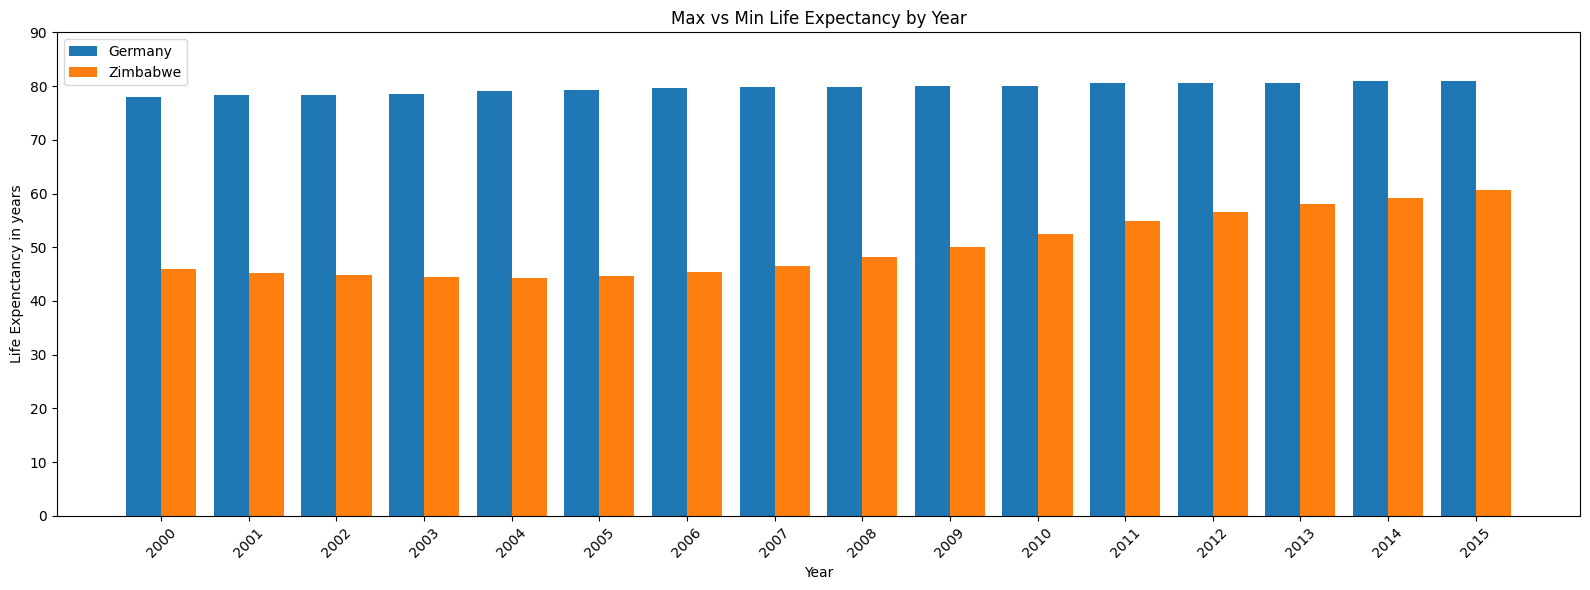

<Figure size 640x480 with 0 Axes>

In [122]:
plt.figure(figsize=(16,6))
#Max bars
n = 1
t = 2
d = len(yearly_results)
w = 0.8

x_values_max = [t * element + w * n for element in range(d)]

#Create 1st plot
plt.bar(x_values_max,yearly_results['Max Life Expectancy'])

#Min bars
n = 2
t = 2
d = len(yearly_results)
w = 0.8

x_values_min = [t * element + w * n for element in range(d)]

#Create 2nd plot
plt.bar(x_values_min,yearly_results['Min Life Expectancy'])


ax = plt.subplot()
x_ticks = [(x1 + x2) / 2 for x1, x2 in zip(x_values_max, x_values_min)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(yearly_results['Year'], rotation=45)

plt.ylim(0, 90)
plt.title('Max vs Min Life Expectancy by Year')
plt.xlabel('Year')
plt.ylabel('Life Expenctancy in years')
ax.legend([yearly_results['Country with Max Life Expectancy'].values[0],yearly_results['Country with Min Life Expectancy'].values[0]],loc='upper left')
plt.tight_layout()
plt.show()
plt.clf()

#### Answer: #### 
*The chart illustrates a clear and consistant patter over years : Germany has the highest life expectancy, while Zimbabwe has the lowest. However, Zimbabwe's life expectancy shows increase over time while Germany's remains relatively same.This suggests that potential improvements in Zimbabwe's socio-economic conditions or public health systems.*

# Question3: What are the trends in GDP over time for each country? #

### Summary Analysis ###

In [124]:
summary = data.groupby('Country')['GDP'].agg(['mean','median']).reset_index()
summary.columns = ['Country','Mean','Median']
print(summary)

                    Country          Mean        Median
0                     Chile  1.697888e+11  1.729975e+11
1                     China  4.957714e+12  4.075195e+12
2                   Germany  3.094776e+12  3.396350e+12
3                    Mexico  9.766506e+11  1.004376e+12
4  United States of America  1.407500e+13  1.445000e+13
5                  Zimbabwe  9.062580e+09  6.733671e+09
